In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pca import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/Admin/Desktop/archive/creditcard.csv')
X = data.drop(columns=['Class']) 
y = data['Class']

In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [3]:
# Display the first few rows of the original dataset
print("Original dataset:")
print(data.head())

# Display the first few rows of the scaled dataset
print("\nScaled dataset:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# Display the first few rows of the PCA-transformed dataset
print("\nPCA-transformed dataset:")
print(pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)]).head())

Original dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

In [11]:
import numpy as np
# Print the mean of the original data
print("Mean of the original data:")
print(pca.mean_)

# Print the covariance matrix
print("\nCovariance matrix:")
print(pca.cov_matx)

# Print the eigenvalues
print("\nEigenvalues:")
print(pca.eigvals[:5])  # Printing only the first 5 eigenvalues

# Print the eigenvectors (principal components)
print("\nEigenvectors (Principal Components):")
print(pca.components)

# Print the variance ratio
print("\nVariance ratio:")
print(pca.information_percent())

# Reconstruct the data using PCA
X_reconstructed = pca.project_data(X_scaled)

# Print the first few rows of the reconstructed data
print("\nReconstructed data (first 5 rows):")
print(pd.DataFrame(X_reconstructed[:5], columns=X.columns))

# Calculate and print the reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)
print(f"\nReconstruction error: {reconstruction_error}")


Mean of the original data:
[-3.06563713e-16 -1.50687242e-17 -9.58011603e-18 -8.62210442e-17
 -5.18922951e-18  3.83204641e-17  9.97928753e-18  1.23743165e-17
 -3.19337201e-18  7.23498346e-19  5.58840102e-18 -4.31105221e-17
  1.67652030e-17 -1.25240058e-17  2.59461476e-17 -2.07569181e-17
  1.83618891e-17  3.39295776e-18  2.63453191e-17  4.36593829e-18
 -1.24741094e-18 -3.64243995e-18  3.19337201e-18  8.78177302e-18
  9.58011603e-18 -5.02956091e-17  5.88777964e-18  2.44492544e-18
 -7.90858537e-18  2.91395196e-17]

Covariance matrix:
[[ 1.00000000e+00  1.17396306e-01 -1.05933271e-02 -4.19618172e-01
  -1.05260205e-01  1.73072123e-01 -6.30164704e-02  8.47143748e-02
  -3.69494347e-02 -8.66043370e-03  3.06166286e-02 -2.47689437e-01
   1.24348068e-01 -6.59020237e-02 -9.87568192e-02 -1.83453273e-01
   1.19028677e-02 -7.32972133e-02  9.04381325e-02  2.89753026e-02
  -5.08660185e-02  4.47357263e-02  1.44059055e-01  5.11423649e-02
  -1.61818685e-02 -2.33082791e-01 -4.14071006e-02 -5.13459112e-03
  

In [4]:
variance_explained = pca.information_percent()
print("Cumulative variance explained by components:", variance_explained)

Cumulative variance explained by components: [0.06527521 0.12139835 0.15473168 0.18806501 0.22139835]


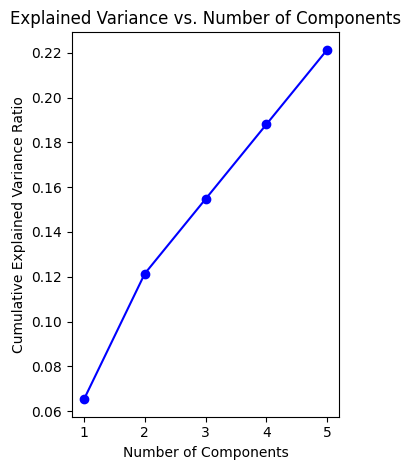

In [5]:
# Plot variance explained by number of components
plt.subplot(1, 2, 2)
n_components = range(1, len(variance_explained) + 1)
plt.plot(n_components, variance_explained, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.xticks(n_components)

plt.tight_layout()
plt.show()


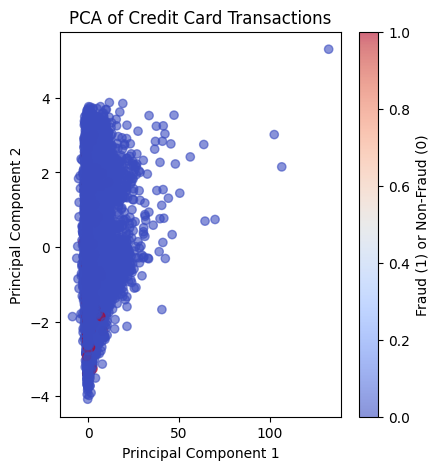

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Credit Card Transactions')
plt.colorbar(label='Fraud (1) or Non-Fraud (0)')
plt.show()